In [1]:
import scrapy
from scrapy.selector import Selector
import re

import selenium
from selenium import webdriver

import pandas as pd

In [2]:
# import all url_links
links_df = pd.read_csv("uwo_ipb_data.csv").drop("Unnamed: 0",axis=1)
links_df.head()

,links,attribute,faculty,program
0,https://www.uwo.ca/ipb/databook/02/auartb02.html,Faculty Complement,ARTS and HUMANITIES,ARTS and HUMANITIES
1,https://www.uwo.ca/ipb/databook/02/clsttb02.html,Faculty Complement,ARTS and HUMANITIES,CLASSICAL STUDIES
2,https://www.uwo.ca/ipb/databook/02/engltb02.html,Faculty Complement,ARTS and HUMANITIES,ENGLISH and WRITING STUDIES
3,https://www.uwo.ca/ipb/databook/02/filmtb02.html,Faculty Complement,ARTS and HUMANITIES,FILM STUDIES
4,https://www.uwo.ca/ipb/databook/02/frentb02.html,Faculty Complement,ARTS and HUMANITIES,FRENCH STUDIES


In [3]:
len(links_df)

628

In [52]:
links_df.head(20)

,links,attribute,faculty,program
0,https://www.uwo.ca/ipb/databook/02/auartb02.html,Faculty Complement,ARTS and HUMANITIES,ARTS and HUMANITIES
1,https://www.uwo.ca/ipb/databook/02/clsttb02.html,Faculty Complement,ARTS and HUMANITIES,CLASSICAL STUDIES
2,https://www.uwo.ca/ipb/databook/02/engltb02.html,Faculty Complement,ARTS and HUMANITIES,ENGLISH and WRITING STUDIES
3,https://www.uwo.ca/ipb/databook/02/filmtb02.html,Faculty Complement,ARTS and HUMANITIES,FILM STUDIES
4,https://www.uwo.ca/ipb/databook/02/frentb02.html,Faculty Complement,ARTS and HUMANITIES,FRENCH STUDIES
5,https://www.uwo.ca/ipb/databook/02/ws__tb02.html,Faculty Complement,ARTS and HUMANITIES,"GENDER, SEXUALITY, and WOMEN'S STUDIES"
6,https://www.uwo.ca/ipb/databook/02/mll_tb02.html,Faculty Complement,ARTS and HUMANITIES,LANGUAGES and CULTURES
7,https://www.uwo.ca/ipb/databook/02/philtb02.html,Faculty Complement,ARTS and HUMANITIES,PHILOSOPHY
8,https://www.uwo.ca/ipb/databook/02/vsartb02.html,Faculty Complement,ARTS and HUMANITIES,VISUAL ARTS
9,https://www.uwo.ca/ipb/databook/02/aub_tb02.html,Faculty Complement,BUSINESS,BUSINESS


In [30]:
pd.unique(links_df['attribute'])

array(['Faculty Complement', 'Staff Complement', 'Program Enrolment',
       'Teaching Activity', 'Undergraduate Cross-Unit Teaching',
       'Undergraduate Courses Taught', 'Undergraduate Class Size',
       'Undergraduate Grade Distribution', 'Research Expenditures'],
      dtype=object)

In [54]:
fac_comp_df = links_df[(links_df['faculty']==links_df['program'])&(links_df['attribute']=='Faculty Complement')]

In [55]:
fac_comp_df

,links,attribute,faculty,program
0,https://www.uwo.ca/ipb/databook/02/auartb02.html,Faculty Complement,ARTS and HUMANITIES,ARTS and HUMANITIES
9,https://www.uwo.ca/ipb/databook/02/aub_tb02.html,Faculty Complement,BUSINESS,BUSINESS
10,https://www.uwo.ca/ipb/databook/02/auedtb02.html,Faculty Complement,EDUCATION,EDUCATION
11,https://www.uwo.ca/ipb/databook/02/aue_tb02.html,Faculty Complement,ENGINEERING,ENGINEERING
16,https://www.uwo.ca/ipb/databook/02/auhstb02.html,Faculty Complement,HEALTH SCIENCES,HEALTH SCIENCES
23,https://www.uwo.ca/ipb/databook/02/auimtb02.html,Faculty Complement,INFORMATION and MEDIA STUDIES,INFORMATION and MEDIA STUDIES
24,https://www.uwo.ca/ipb/databook/02/aul_tb02.html,Faculty Complement,LAW,LAW
25,https://www.uwo.ca/ipb/databook/02/aum_tb02.html,Faculty Complement,MEDICINE and DENTISTRY (MEDICINE),MEDICINE and DENTISTRY (MEDICINE)
26,https://www.uwo.ca/ipb/databook/02/aud_tb02.html,Faculty Complement,MEDICINE and DENTISTRY (DENTISTRY),MEDICINE and DENTISTRY (DENTISTRY)
37,https://www.uwo.ca/ipb/databook/02/aumutb02.html,Faculty Complement,MUSIC,MUSIC


# Functions

In [ ]:
# students/professors
# 

In [31]:
def getRandomLink(attr,seed):
    return(links_df[links_df['attribute']==attr]['links'].sample(1,random_state=seed).values[0])
    

In [40]:
getRandomLink('Faculty Complement',9)

'https://www.uwo.ca/ipb/databook/02/philtb02.html'

In [56]:
getFacultyCount(getRandomLink("Faculty Complement",9))

,year,tenure,probation,limited,physician,other,total
0,10/11,19,10,0,0,0,29
1,11/12,20,8,0,0,0,28
2,12/13,24,4,0,0,0,28
3,13/14,25,5,0,0,0,30
4,14/15,25,5,0,0,0,30
5,15/16,25,5,0,0,0,30
6,16/17,22,3,1,0,0,26
7,17/18,24,2,1,0,0,27
8,18/19,23,0,1,0,0,24
9,19/20,21,0,0,0,0,21


In [50]:
getStaffCount(getRandomLink("Staff Complement",4))

,year,operating,research,other,total
0,10/11,3,0,0,3
1,11/12,3,0,0,3
2,12/13,3,0,0,3
3,13/14,3,0,0,3
4,14/15,3,0,0,3
5,15/16,3,0,0,3
6,16/17,3,0,0,3
7,17/18,3,0,0,3
8,18/19,3,0,0,3


In [64]:
getGrades(getRandomLink("Undergraduate Grade Distribution",5))

,year,freshA,freshF,upperA,upperF,totalA,totalF
0,10/11,63.5,11.9,68.0,8.9,64.7,11.1
1,11/12,54.6,11.2,62.9,8.8,56.6,10.6
2,12/13,68.5,6.1,67.7,7.7,68.3,6.5
3,13/14,61.5,8.7,65.2,5.8,62.3,8.1
4,14/15,66.0,6.6,66.5,5.7,66.1,6.4
5,15/16,62.9,7.5,55.4,7.2,60.9,7.4
6,16/17,58.9,8.3,55.2,5.7,57.8,7.5
7,17/18,64.2,6.9,64.0,4.6,64.1,6.2
8,18/19,63.4,8.0,60.0,8.5,62.5,8.2
9,19/20,73.6,4.5,76.9,2.9,74.6,4.0


In [70]:
links_df[(links_df['program']=='ARTS and HUMANITIES')&(links_df['attribute']=='Teaching Activity')]['links'].values[0]

'https://www.uwo.ca/ipb/databook/05/auartb05.html'

In [71]:
teachURL = links_df[(links_df['program']=='ARTS and HUMANITIES')&(links_df['attribute']=='Teaching Activity')]['links'].values[0]
enrollURL = links_df[(links_df['program']=='ARTS and HUMANITIES')&(links_df['attribute']=='Program Enrolment')]['links'].values[0]

In [76]:
driver = webdriver.Chrome()
driver.get(teachURL)

In [72]:
# What do these numbers mean? Could we use them for something? 
getTeachAct(teachURL)

,year,UG_DL_summ,UG_DL_f/w,UG_DL_total,UG_OC_summ,UG_OC_f/w_1,UG_OC_f/w_upper,UG_OC_total,UG_total,MS,PhD,Dipl,CP,Grad_total
0,10/11,606.5,672.5,"1,279.0",570.5,"4,533.5","8,775.5","13,879.5","15,158.5",152.0,264.0,-,0.0,416.0
1,11/12,649.0,629.0,"1,278.0",622.0,"4,479.5","8,785.5","13,887.0","15,165.0",127.2,261.4,-,0.0,388.6
2,12/13,547.0,691.5,"1,238.5",567.0,"4,434.0","8,610.0","13,611.0","14,849.5",111.5,272.1,-,0.0,383.6
3,13/14,616.5,756.0,"1,372.5",581.0,"4,193.0","8,307.5","13,081.5","14,454.0",121.5,255.1,-,0.0,376.6
4,14/15,553.5,724.5,"1,278.0",463.0,"4,272.0","7,859.0","12,594.0","13,872.0",116.2,263.2,0.0,0.0,379.4
5,15/16,650.0,729.0,"1,379.0",338.0,"4,122.0","7,959.0","12,419.0","13,798.0",102.6,248.0,0.0,0.0,350.6
6,16/17,545.5,867.0,"1,412.5",269.0,"4,185.5","7,944.0","12,398.5","13,811.0",118.2,234.3,0.0,0.0,352.5
7,17/18,379.0,647.5,"1,026.5",92.0,"3,907.0","7,790.5","11,789.5","12,816.0",128.1,248.8,0.0,0.0,376.9
8,18/19,473.5,724.5,"1,198.0",113.5,"3,976.5","7,324.8","11,414.8","12,612.8",131.8,241.2,0.0,0.0,373.0


In [73]:
getProgEnrol(enrollURL)

,year,UG_1,UG_2/3,UG_3/3,UG_2/4,UG_3/4,UG_4/4,UG_spec,UG_prof,UG_CP,...,UG_total,MS_full,MS_part,PHD_full,PHD_part,Dip_full,Dip_part,CP_full,Grad_total_full,Grad_total_part
0,10/11,258,74,49,259,297,306,17,0,0,...,"1,260",152,0,258,20,-,-,0,410,20
1,11/12,272,77,32,264,267,302,17,0,0,...,"1,232",126,4,256,18,-,-,0,382,22
2,12/13,236,62,38,256,277,289,17,0,0,...,"1,180",110,5,267,17,-,-,0,377,22
3,13/14,213,73,51,244,262,291,12,0,2,...,"1,149",120,5,250,17,-,-,0,370,22
4,14/15,267,76,59,202,224,278,13,0,3,...,"1,124",115,4,256,24,0,0,0,371,28
5,15/16,217,69,64,224,191,247,15,0,6,...,"1,033",102,2,242,20,0,0,0,344,22
6,16/17,240,14,30,262,212,211,8,0,8,...,987,117,4,228,21,0,0,0,345,25
7,17/18,229,5,30,266,214,232,9,0,7,...,992,126,7,244,16,0,0,0,370,23
8,18/19,233,5,19,230,202,236,11,0,6,...,944,130,6,234,24,0,0,0,364,30
9,19/20,209,4,9,241,196,216,7,0,7,...,889,111,7,240,24,0,0,0,351,31


In [58]:
getProgEnrol(getRandomLink("Program Enrolment",1))

,year,UG_1,UG_2/3,UG_3/3,UG_2/4,UG_3/4,UG_4/4,UG_spec,UG_prof,UG_CP,...,UG_total,MS_full,MS_part,PHD_full,PHD_part,Dip_full,Dip_part,CP_full,Grad_total_full,Grad_total_part
0,10/11,0,0,3,17,18,14,0,0,0,...,52,-,-,-,-,-,-,-,-,-
1,11/12,0,0,1,8,12,15,0,0,0,...,36,-,-,-,-,-,-,-,-,-
2,12/13,0,0,1,7,7,13,0,0,0,...,28,-,-,-,-,-,-,-,-,-
3,13/14,0,0,0,6,8,9,0,0,0,...,23,-,-,-,-,-,-,-,-,-
4,14/15,0,1,0,23,8,8,0,0,0,...,40,-,-,-,-,-,-,-,-,-
5,15/16,0,1,1,20,16,11,0,0,0,...,49,-,-,-,-,-,-,-,-,-
6,16/17,0,0,1,20,23,16,0,0,0,...,60,-,-,-,-,-,-,-,-,-
7,17/18,0,0,0,18,18,24,0,0,0,...,60,-,-,-,-,-,-,-,-,-
8,18/19,0,0,0,10,17,18,0,0,0,...,45,-,-,-,-,-,-,-,-,-
9,19/20,0,0,0,14,9,17,0,0,0,...,40,-,-,-,-,-,-,-,-,-


In [28]:
def getFacultyCount(url):
    driver = webdriver.Chrome()
    driver.get(url)
    scrapy_selector = Selector(text = driver.page_source)
    faculty = []
    for i in range(4,14):
        faculty.append(driver.find_elements_by_xpath("/html/body/div/div[2]/div/center/table[2]/tbody/tr["+str(i)+"]")[0].text.split(" ")[:7])
    
    
    faculty_df = pd.DataFrame.from_records(faculty)
    faculty_df.columns=['year','tenure','probation','limited','physician','other','total']
    driver.quit()
    return(faculty_df)    

In [29]:
def getStaffCount(url):
    driver = webdriver.Chrome()
    driver.get(url)
    scrapy_selector = Selector(text = driver.page_source)
    staff = []
    for i in range(3,12):
        staff.append(driver.find_elements_by_xpath("/html/body/div/div[2]/div/center/table[2]/tbody/tr["+str(i)+"]")[0].text.split(" ")[:5])
    
    
    staff_df = pd.DataFrame.from_records(staff)
    staff_df.columns=['year','operating','research','other','total']
    driver.quit()
    return(staff_df)    

In [4]:
def getTeachAct(url):
    driver = webdriver.Chrome()
    driver.get(url)
    scrapy_selector = Selector(text = driver.page_source)
    teach = []
    for i in range(5,14):
        teach.append(driver.find_elements_by_xpath("/html/body/div/div[2]/div/center/table[2]/tbody/tr["+str(i)+"]")[0].text.split(" "))
    
    teach_df = pd.DataFrame.from_records(teach)
    teach_df.columns = ['year','UG_DL_summ','UG_DL_f/w','UG_DL_total','UG_OC_summ','UG_OC_f/w_1','UG_OC_f/w_upper','UG_OC_total','UG_total','MS','PhD','Dipl','CP','Grad_total']
    driver.quit()
    return(teach_df)

In [5]:
def getProgEnrol(url):
    driver = webdriver.Chrome()
    driver.get(url)
    scrapy_selector = Selector(text = driver.page_source)
    enroll = []
    for i in range(4,14):
        enroll.append(driver.find_elements_by_xpath("/html/body/div/div[2]/div/center/table[2]/tbody/tr["+str(i)+"]")[0].text.split(" "))

    enroll_df = pd.DataFrame.from_records(enroll)
    enroll_df.columns=['year','UG_1','UG_2/3','UG_3/3','UG_2/4','UG_3/4','UG_4/4', 'UG_spec','UG_prof','UG_CP','UG_other','UG_total','MS_full','MS_part','PHD_full','PHD_part','Dip_full','Dip_part','CP_full','Grad_total_full','Grad_total_part']
    driver.quit()
    return(enroll_df)    
    

In [63]:
def getGrades(url):
    driver = webdriver.Chrome()
    driver.get(url)
    scrapy_selector = Selector(text = driver.page_source)    

    # grades table
    grades=[]
    for i in range(5,15):
        grades.append(driver.find_elements_by_xpath("/html/body/div/div[2]/div/center/table[2]/tbody/tr["+str(i)+"]")[0].text.split(" "))
        
    grades_df = pd.DataFrame.from_records(grades)
    grades_df.columns=['year','freshA','freshF','upperA','upperF','totalA','totalF']
    driver.quit()
    return(grades_df)

In [42]:
def getResExp(url):
    driver = webdriver.Chrome()
    driver.get(url)
    scrapy_selector = Selector(text = driver.page_source)
    resexp = []
    for i in range(3,12):
        resexp.append(driver.find_elements_by_xpath("/html/body/div/div[2]/div/center/table[2]/tbody/tr["+str(i)+"]")[0].text.split(" "))
    
    
    resexp_df = pd.DataFrame.from_records(resexp)
    resexp_df.columns=['year','res_exp','active_grants']
    driver.quit()
    return(resexp_df)    

# Scratch

In [8]:
sample_url = links_df[links_df['attribute']=='Undergraduate Class Size']['links'].iloc[11]
driver = webdriver.Chrome()
driver.get(sample_url)

In [110]:
driver.find_elements_by_xpath("/html/body/div/div[2]/div/center/table[3]/tbody/tr["+str(14)+"]")[0].text

'19/20 1.5 21.7 1.0 38.0 2.5 28.2 0.0 60.0 20.0 20.0 0.0 0.0'

In [68]:

driver.find_elements_by_xpath("/html/body/div/div[2]/div/center/table[2]/tbody/tr["+str(12)+"]")[0].text.split(" ")

['19/20', '2,289,404', '211']

In [45]:
driver.find_elements_by_xpath("/html/body/div/div[2]/div/center/table[2]/tbody/tr["+str(3)+"]")[0].text.split(" ")[:5]

['10/11', '41', '0', '1', '42']

In [52]:
driver = webdriver.Chrome()
getStaffCount("https://www.uwo.ca/ipb/databook/03/auartb03.html")
driver.quit()

In [11]:
links_df['attribute'].value_counts()

Program Enrolment                    97
Teaching Activity                    87
Research Expenditures                69
Undergraduate Courses Taught         66
Undergraduate Class Size             66
Undergraduate Cross-Unit Teaching    66
Undergraduate Grade Distribution     65
Faculty Complement                   56
Staff Complement                     56
Name: attribute, dtype: int64

In [13]:
for link in links_df[links_df['attribute']=='Faculty Complement']['links']:
    getFacultyComplement(link).to_csv()

,links,attribute,faculty,program
0,https://www.uwo.ca/ipb/databook/02/auartb02.html,Faculty Complement,ARTS and HUMANITIES,ARTS and HUMANITIES
1,https://www.uwo.ca/ipb/databook/02/clsttb02.html,Faculty Complement,ARTS and HUMANITIES,CLASSICAL STUDIES
2,https://www.uwo.ca/ipb/databook/02/engltb02.html,Faculty Complement,ARTS and HUMANITIES,ENGLISH and WRITING STUDIES
3,https://www.uwo.ca/ipb/databook/02/filmtb02.html,Faculty Complement,ARTS and HUMANITIES,FILM STUDIES
4,https://www.uwo.ca/ipb/databook/02/frentb02.html,Faculty Complement,ARTS and HUMANITIES,FRENCH STUDIES
5,https://www.uwo.ca/ipb/databook/02/ws__tb02.html,Faculty Complement,ARTS and HUMANITIES,"GENDER, SEXUALITY, and WOMEN'S STUDIES"
6,https://www.uwo.ca/ipb/databook/02/mll_tb02.html,Faculty Complement,ARTS and HUMANITIES,LANGUAGES and CULTURES
7,https://www.uwo.ca/ipb/databook/02/philtb02.html,Faculty Complement,ARTS and HUMANITIES,PHILOSOPHY
8,https://www.uwo.ca/ipb/databook/02/vsartb02.html,Faculty Complement,ARTS and HUMANITIES,VISUAL ARTS
9,https://www.uwo.ca/ipb/databook/02/aub_tb02.html,Faculty Complement,BUSINESS,BUSINESS


In [55]:
links_df[links_df['attribute']=='Faculty Complement'].iloc[0]['faculty']

'ARTS and HUMANITIES'

In [20]:
title = links_df[links_df['attribute']=='Faculty Complement'].iloc[0]['faculty']
url = links_df[links_df['attribute']=='Faculty Complement'].iloc[0]['links']
df1 = getFacultyCount(url)


In [30]:
df1

,year,tenure,probation,limited,physician,other,total
0,10/11,93,37,14,0,0,144
1,11/12,99,35,17,0,0,151
2,12/13,102,32,19,0,0,153
3,13/14,108,32,16,0,0,156
4,14/15,108,31,15,0,0,154
5,15/16,115,24,16,0,0,155
6,16/17,113,19,18,0,0,150
7,17/18,109,15,18,0,0,142
8,18/19,113,5,23,0,0,141
9,19/20,111,2,17,0,0,130


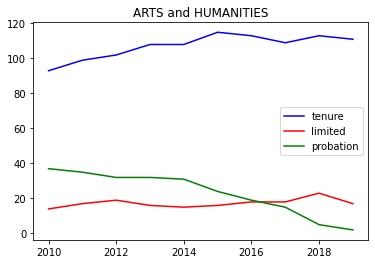

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = pd.to_numeric('20'+df1['year'].str[:-3])
ax.plot(x, pd.to_numeric(df1['tenure']), '-b', label='tenure')
ax.plot(x, pd.to_numeric(df1['limited']), '-r', label='limited')
ax.plot(x, pd.to_numeric(df1['probation']), '-g', label='probation')
leg = ax.legend();
plt.title(title)
plt.savefig(title)